## Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the File

In [2]:
cars_data=pd.read_csv('Cars.csv')
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


### Initial Investigation

In [3]:
cars_data.shape

(81, 5)

In [4]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [5]:
cars_data.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

### Assumptions Check

#### Linearity

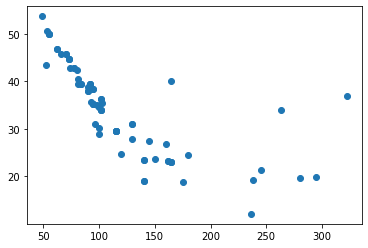

In [6]:
plt.scatter(x='HP',y='MPG', data=cars_data)

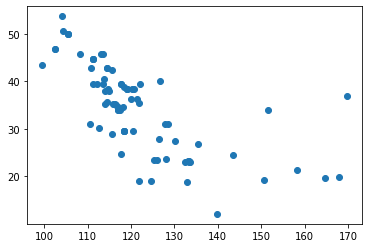

In [7]:
plt.scatter(x='SP',y='MPG', data=cars_data)

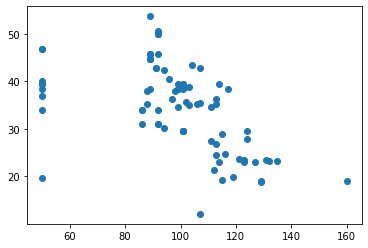

In [8]:
plt.scatter(x='VOL',y='MPG', data=cars_data)

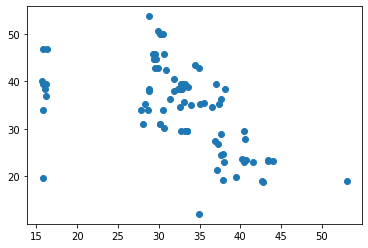

In [9]:
plt.scatter(x='WT',y='MPG', data=cars_data)

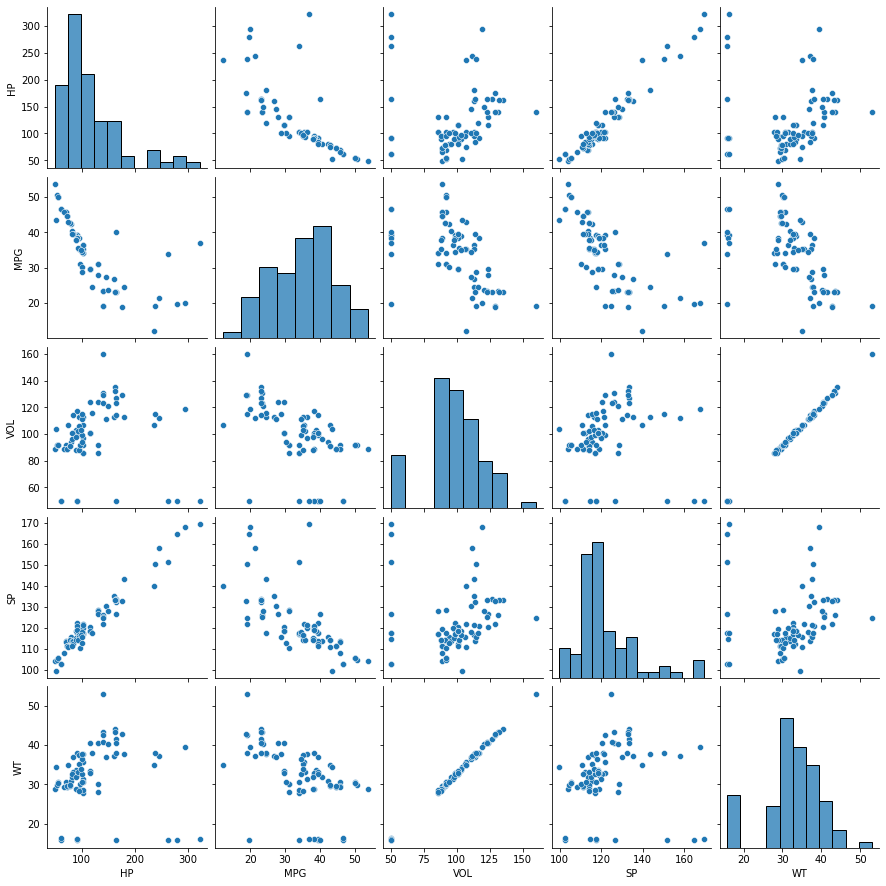

In [10]:
sns.pairplot(cars_data)

#### MultiCollinearity Check
1. Correlation Matrix
2. VIF - Variance Infaltion Factor

In [11]:
cars_data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [1]:
#Multicollinearity- High multicollinearit columns can be dropped
import numpy as np
X=np.array(cars_data)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
print(vif)
X=pd.DataFrame()

NameError: name 'cars_data' is not defined

#### Point to Remember

* Higher vif high multicollinearity
* Lesser Vif less multicollinearity

## 5. Data Preparation/Data Processing

In [13]:
cars_data.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [14]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

## 6. Model Building

In [15]:
X=cars_data[['HP','VOL','SP','WT']]
y=cars_data[['MPG']]

In [16]:
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [17]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


In [18]:
from sklearn.model_selection import train_test_split #Splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(64, 4)
(64, 1)
(17, 4)
(17, 1)


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor

#Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

#DT Regressor
dt_reg_model=DecisionTreeRegressor(max_depth=5)
dt_reg_model.fit(X_train,y_train)

#RF Regressor
rf_reg_model=RandomForestRegressor(max_depth=5)
rf_reg_model.fit(X_train,y_train)

<ipython-input-95-a108202fe77c>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_model.fit(X_train,y_train)


RandomForestRegressor(max_depth=5)

## 7. Model Training

In [89]:
linear_model.coef_ #slope

array([[-0.19773369, -0.44126845,  0.37394956,  0.71555308]])

In [90]:
linear_model.intercept_

array([32.33573042])

## 8. Model Testing

#### 8.1 Training Data

In [91]:
#Linear Model
y_pred_train_lin=linear_model.predict(X_train)

#DT Regressor
y_pred_train_dt=dt_reg_model.predict(X_train)

#RF Regressor
y_pred_train_rf=rf_reg_model.predict(X_train)

#### 8.2 Test Data

In [92]:
#Linear Model
y_pred_test_lin=linear_model.predict(X_test)

#DT Regressor
y_pred_test_dt=dt_reg_model.predict(X_test)

#RF Regressor
y_pred_test_rf=rf_reg_model.predict(X_test)

## 9. Model Evaluation

### 9.1 Train Accuracy

In [96]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
#Linear Model
print("Linear_Model")
print("MSE : {}".format(mean_squared_error(y_train,y_pred_train_lin)))
print("R2_Score : {}".format(r2_score(y_train,y_pred_train_lin)))

#DT Model
print("Decision Tree")
print("MSE : {}".format(mean_squared_error(y_train,y_pred_train_dt)))
print("R2_Score : {}".format(r2_score(y_train,y_pred_train_dt)))

#RF Model
print("Random Forest")
print("MSE : {}".format(mean_squared_error(y_train,y_pred_train_rf)))
print("R2_Score : {}".format(r2_score(y_train,y_pred_train_rf)))

Linear_Model
MSE : 18.46186300456174
R2_Score : 0.7650776371416239
Decision Tree
MSE : 0.5314876327257865
R2_Score : 0.9932369593210016
Random Forest
MSE : 2.23231333724595
R2_Score : 0.9715943984799092


<function matplotlib.pyplot.show(close=None, block=None)>

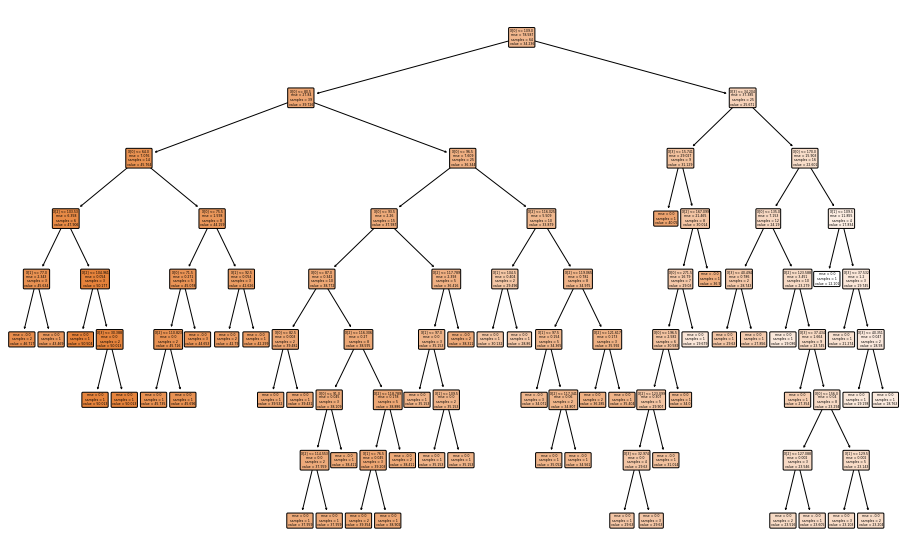

In [94]:
dt_train_model=DecisionTreeRegressor().fit(X_train,y_train)
plt.figure(figsize=[16,10])
plot_tree(dt_train_model,rounded=True,filled=True)
plt.show

### 9.2 Test Accuracy

In [97]:
#Linear Model
print("Linear_Model")
print("MSE : {}".format(mean_squared_error(y_test,y_pred_test_lin)))
print("R2_Score : {}".format(r2_score(y_test,y_pred_test_lin)))

#DT Model
print("Decision Tree")
print("MSE : {}".format(mean_squared_error(y_test,y_pred_test_dt)))
print("R2_Score : {}".format(r2_score(y_test,y_pred_test_dt)))

#RF Model
print("Random Forest")
print("MSE : {}".format(mean_squared_error(y_test,y_pred_test_rf)))
print("R2_Score : {}".format(r2_score(y_test,y_pred_test_rf)))

Linear_Model
MSE : 20.989355058699147
R2_Score : 0.7811573760752827
Decision Tree
MSE : 6.503562205035327
R2_Score : 0.9321915030820503
Random Forest
MSE : 5.914981847589755
R2_Score : 0.9383282552334964


<function matplotlib.pyplot.show(close=None, block=None)>

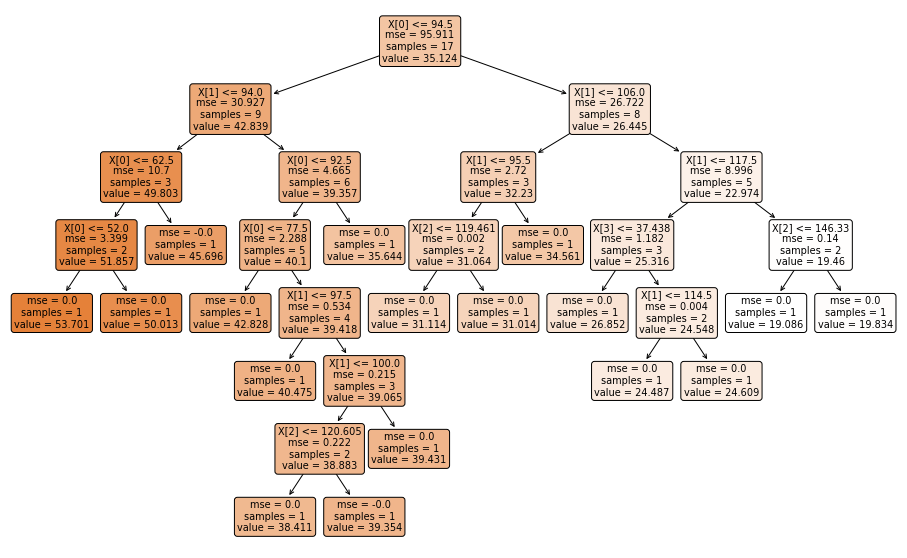

In [87]:
dt_test_model=DecisionTreeRegressor().fit(X_test,y_test)
plt.figure(figsize=[16,10])
plot_tree(dt_test_model,rounded=True,filled=True)
plt.show

## 10. Model Optimization 

In [27]:
import statsmodels.formula.api as smf

In [28]:
#Model-1
model = smf.ols('MPG~HP+SP+VOL+WT', data=cars_data).fit()

In [29]:
#slope - m
model.params

Intercept    30.677336
HP           -0.205444
SP            0.395627
VOL          -0.336051
WT            0.400574
dtype: float64

In [30]:
model.pvalues

#Ho=There is no significance/difference for me(input feature)
#Ha=There is a significance/difference.

#p<0.05, Reject Ho

Intercept    0.042936
HP           0.000001
SP           0.014579
VOL          0.556294
WT           0.813649
dtype: float64

In [31]:
#Model -2
model_2=smf.ols('MPG~HP+SP', data=cars_data).fit()

In [32]:
model_2.pvalues

Intercept    0.208002
HP           0.002129
SP           0.284508
dtype: float64

In [33]:
#Model - 3
model_3=smf.ols('MPG~HP', data=cars_data).fit()

In [34]:
model_3.pvalues

Intercept    1.211037e-44
HP           1.956490e-14
dtype: float64

In [35]:
#Model - 4
model_4=smf.ols('MPG~SP', data=cars_data).fit()

In [36]:
model_4.pvalues

Intercept    1.457105e-22
SP           1.407325e-12
dtype: float64

In [37]:
#Model - 5
model_5=smf.ols('MPG~VOL', data=cars_data).fit()

In [38]:
model_5.pvalues

Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64

In [39]:
#Model - 6
model_6=smf.ols('MPG~WT', data=cars_data).fit()

In [40]:
model_6.pvalues

Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64

In [41]:
#Model - 7
model_7=smf.ols('MPG~VOL+WT', data=cars_data).fit()

In [42]:
model_7.pvalues

Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64

In [43]:
#Model - 8
model_8=smf.ols('MPG~HP+SP+VOL', data=cars_data).fit()

In [44]:
model_8.pvalues

Intercept    4.194554e-02
HP           8.644870e-07
SP           1.207855e-02
VOL          1.648229e-13
dtype: float64

In [45]:
#Model-9
model_9=smf.ols('MPG~SP+HP+WT', data=cars_data).fit()

In [46]:
model_9.pvalues

Intercept    5.053995e-02
SP           1.089096e-02
HP           7.560276e-07
WT           1.914892e-13
dtype: float64

## 11. Optimized Models Evaluation

In [47]:
model.aic,model.rsquared #error metric and needs to be less

(477.9279049354879, 0.7705372737359844)

In [48]:
model_2.aic,model_2.rsquared

(531.5481466080848, 0.532639171285165)

In [49]:
model_3.aic,model_3.rsquared

(530.7452702659343, 0.5256806086282022)

In [50]:
model_4.aic,model_4.rsquared

(539.408199092848, 0.4721402334141217)

In [51]:
model_5.aic,model_5.rsquared

(564.5634161305575, 0.2799008651122705)

In [52]:
model_6.aic,model_6.rsquared

(564.8358142145094, 0.2774751389270125)

In [53]:
model_7.aic,model_7.rsquared

(566.3145901819738, 0.2821095616445978)

In [54]:
model_8.aic,model_8.rsquared

(475.9875158854609, 0.770368341321302)

In [55]:
model_9.aic,model_9.rsquared

(476.29927501529755, 0.7694828139983461)

In [56]:
#model-HP+WT+SP+VOL 477.9279049354879, 0.7705372737359844
#model2-HP+WT       531.5481466080848, 0.532639171285165
#model7-VOL+WT      566.3145901819738, 0.2821095616445978
#model8-SP+HP+VOL   475.9875158854609, 0.770368341321302
#model9-SP+HP+WT    476.29927501529755, 0.7694828139983461
#check for less aic and high r2

In [57]:
#model-HP+WT+SP+VOL-(477.9279049354879, 0.7705372737359844)
#model8-SP+HP+VOL-(475.9875158854609, 0.770368341321302)
#model9-SP+HP+WT-(476.29927501529755, 0.7694828139983461)